# Audio Analysis of National Anthem Music Files

 In this notebook, we perform a comprehensive audio analysis on the national anthem music files.

 **Objectives:**
 1. **Data Loading:**  
    Load the audio files (e.g., mp3 format) from a designated folder (e.g., `anthem_mp3/`).

 2. **Feature Extraction and Visualization:**  
    - Plot the waveform of the audio.
    - Generate and visualize the spectrogram and Mel-spectrogram.
    - Compute and visualize Mel Frequency Cepstral Coefficients (MFCCs).
    - Extract additional features such as tempo, zero crossing rate, and spectral centroid.

 3. **Comparative Analysis:**  
    Explore the differences across various national anthems, similar in spirit to our visual analysis of flags.

### This notebook demonstrates various standard methods for exploring and analyzing audio data.


## 1. Setup and Data Loading
- We first import the necessary libraries for audio processing and visualization.  
- We assume that the audio files are stored in a folder named `anthem_mp3/`.


In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display

# Set plot style for consistency
sns.set(style="whitegrid")

# Define the directory containing the audio files
audio_dir = "anthem_mp3"

# List all mp3 files in the directory
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.mp3')]
print("Found audio files:")
print(audio_files)


C:\Users\iitia\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Found audio files:
['AE.mp3', 'AR.mp3', 'AT.mp3', 'AU.mp3', 'BE.mp3', 'BG.mp3', 'BR.mp3', 'CA.mp3', 'CH.mp3', 'CL.mp3', 'CN.mp3', 'CO.mp3', 'CZ.mp3', 'DE.mp3', 'DK.mp3', 'ES.mp3', 'FI.mp3', 'FR.mp3', 'GB.mp3', 'GR.mp3', 'HU.mp3', 'ID.mp3', 'IE.mp3', 'IL.mp3', 'IN.mp3', 'IT.mp3', 'JP.mp3', 'KR.mp3', 'MX.mp3', 'MY.mp3', 'NG.mp3', 'NL.mp3', 'NO.mp3', 'NZ.mp3', 'PE.mp3', 'PK.mp3', 'PL.mp3', 'PT.mp3', 'RO.mp3', 'RU.mp3', 'SA.mp3', 'SE.mp3', 'SG.mp3', 'SI.mp3', 'SK.mp3', 'TH.mp3', 'TR.mp3', 'US.mp3', 'VN.mp3']


## 2. Loading and Listening to an Audio File

- Let's load one sample audio file to analyze its content.  
- We will use `librosa.load` to read the audio file and then display its waveform.


In [2]:

# Select a sample audio file (for example, the first one in the list)
sample_audio_file = os.path.join(audio_dir, 'IN.mp3')
print(f"Analyzing audio file: {sample_audio_file}")

# Load the audio file using librosa (default sampling rate is 22050 Hz)
y, sr = librosa.load(sample_audio_file, sr=None)  # sr=None to preserve the original sampling rate
print(f"Audio loaded. Duration: {len(y)/sr:.2f} seconds, Sampling Rate: {sr} Hz")

# Listen to the audio (works in Jupyter notebooks)
display(Audio(sample_audio_file))


Analyzing audio file: anthem_mp3\IN.mp3
Audio loaded. Duration: 63.69 seconds, Sampling Rate: 44100 Hz


## 3. Waveform Visualization
- We now plot the waveform of the audio signal to observe its amplitude over time.


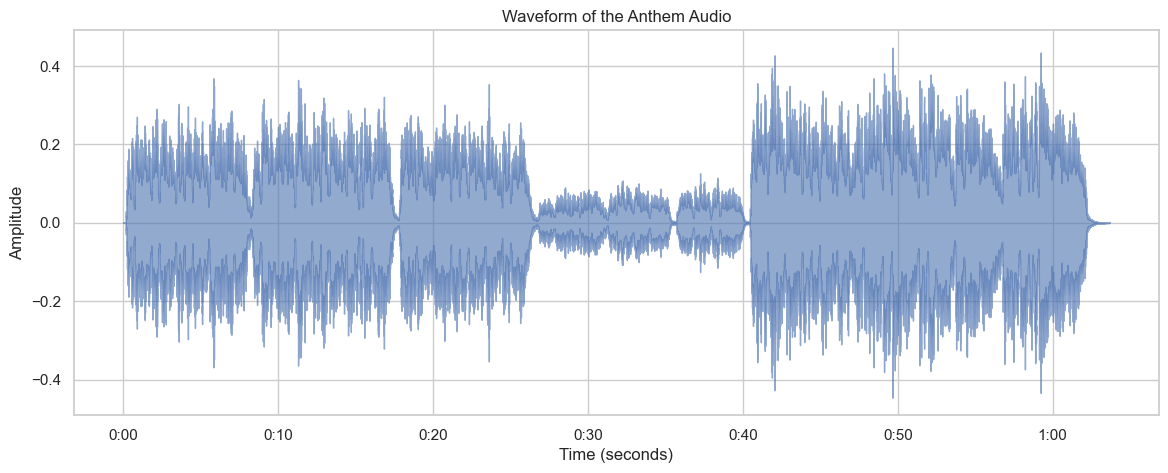

In [3]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title("Waveform of the Anthem Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


## 4. Spectrogram and Mel-Spectrogram Analysis

-  **Spectrogram:**  
    - A spectrogram shows how the frequency content of the audio signal varies over time.
-  **Mel-Spectrogram:**  
    -The Mel-spectrogram maps frequencies to the Mel scale, which better reflects the human auditory perception.


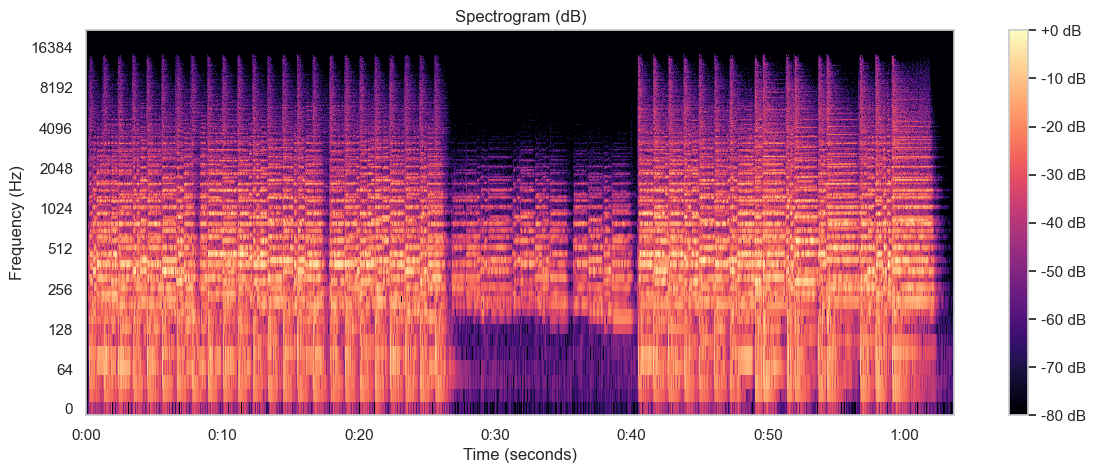

In [4]:

# Compute Short-Time Fourier Transform (STFT)
D = librosa.stft(y)
# Convert amplitude to decibels
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()


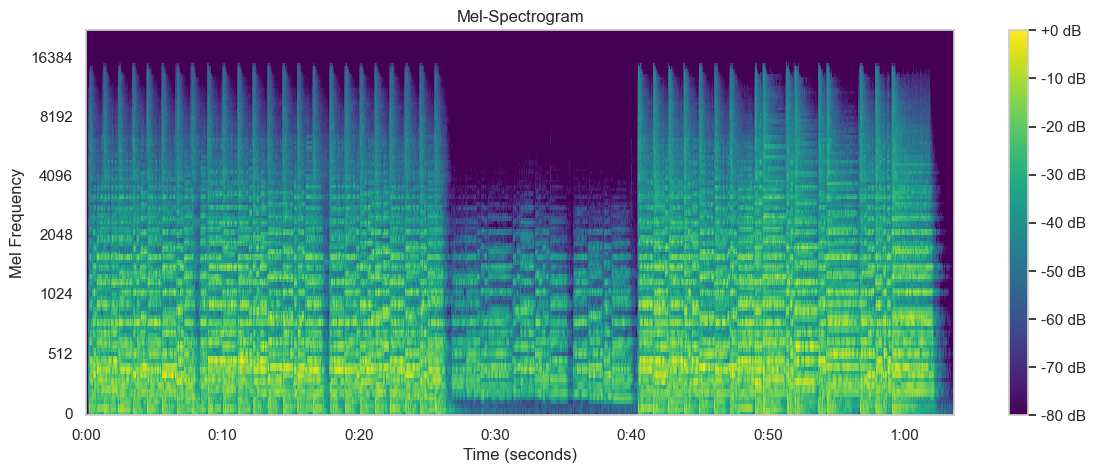

In [5]:
# Compute Mel-spectrogram with keyword argument for y
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Mel Frequency")
plt.show()


## 5. MFCC Feature Extraction

- Mel Frequency Cepstral Coefficients (MFCCs) capture the timbral aspects of the audio and are widely used in audio analysis tasks.


MFCCs shape: (13, 5486)


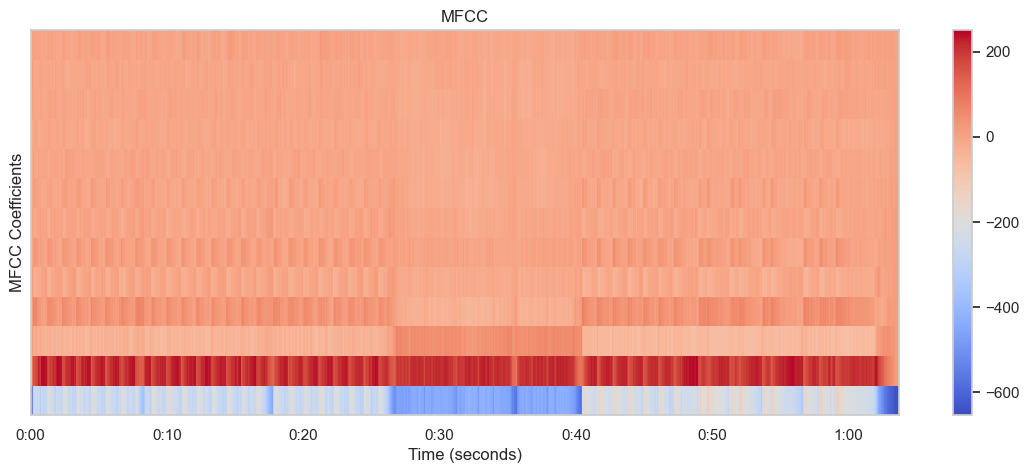

In [6]:

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCCs shape:", mfccs.shape)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title("MFCC")
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.show()



## 6. Additional Audio Feature Analysis
- In addition to the above, we extract several other audio features:

- **Tempo and Beat Tracking:**  
    -  Estimate the tempo (in beats per minute) and extract beat frames.
- **Zero Crossing Rate:**  
    -  The rate at which the signal changes sign, which is useful for characterizing the noisiness of the signal.

- **Spectral Centroid:**  
    -  Indicates the "center of mass" of the spectrum.


C:\Users\iitia\AppData\Local\Temp\ipykernel_26584\3960332210.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Estimated Tempo: {float(tempo):.2f} BPM")


Estimated Tempo: 54.40 BPM


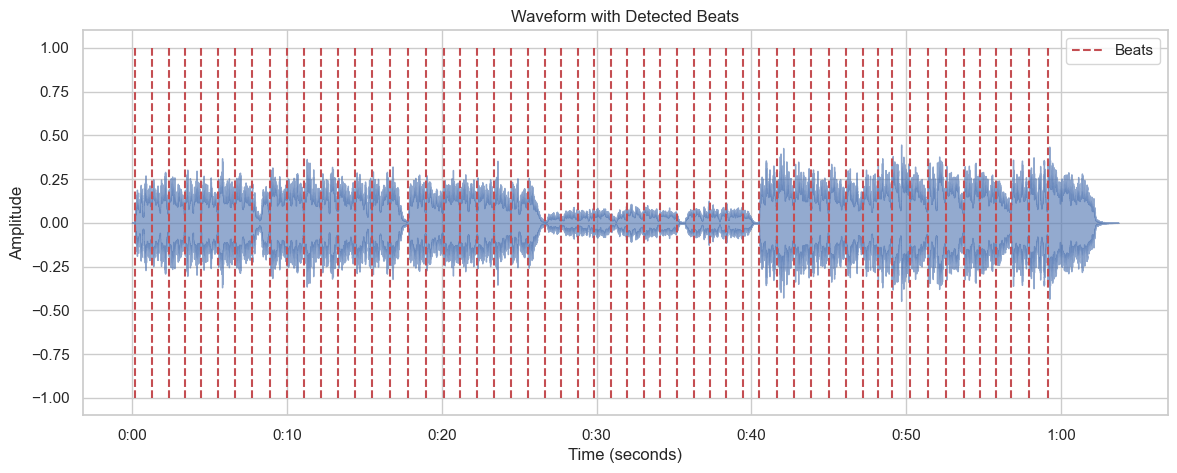

In [7]:
# Estimate tempo and beat frames
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f"Estimated Tempo: {float(tempo):.2f} BPM")

# Convert beat frames to time values
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')
plt.title("Waveform with Detected Beats")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Zero Crossing Rate shape: (1, 5486)


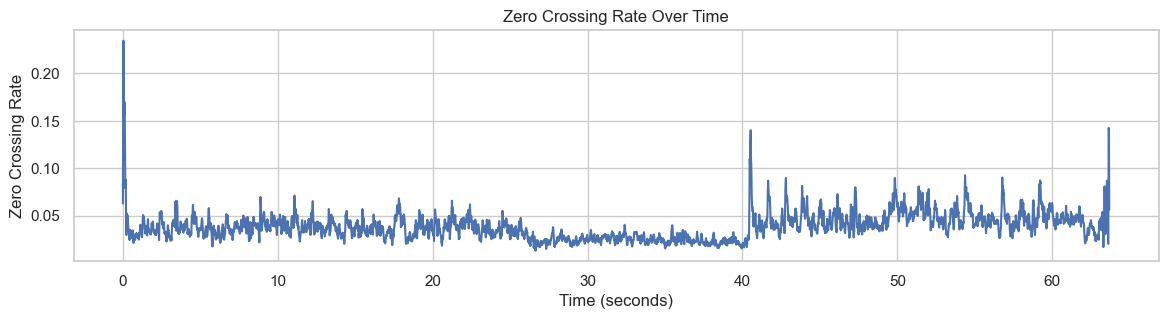

In [8]:

# Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)
print("Zero Crossing Rate shape:", zcr.shape)

plt.figure(figsize=(14, 3))
plt.plot(librosa.frames_to_time(np.arange(zcr.shape[1]), sr=sr), zcr[0])
plt.xlabel("Time (seconds)")
plt.ylabel("Zero Crossing Rate")
plt.title("Zero Crossing Rate Over Time")
plt.show()


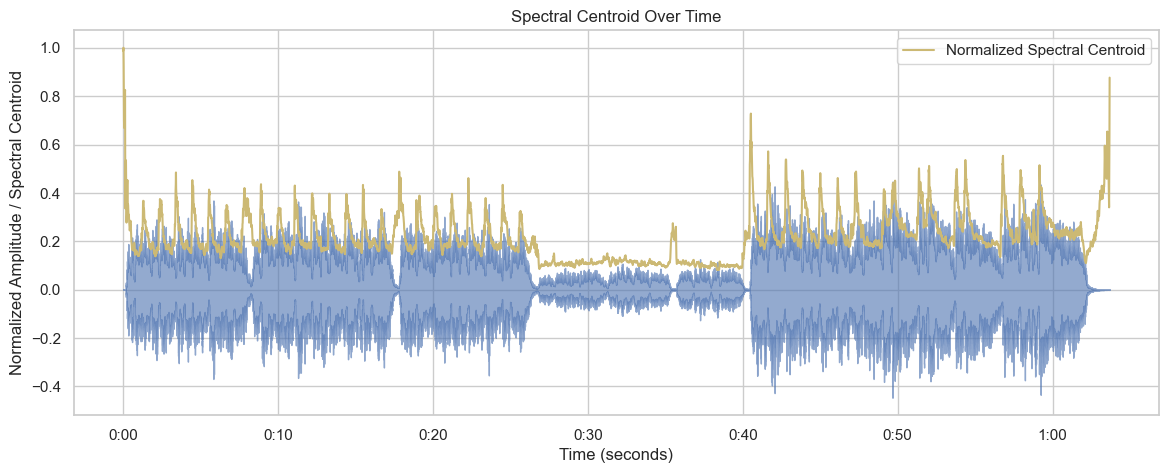

In [9]:

# Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.plot(t, spectral_centroids / np.max(spectral_centroids), color='y', label='Normalized Spectral Centroid')
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude / Spectral Centroid")
plt.title("Spectral Centroid Over Time")
plt.legend()
plt.show()


## 7. Comparative Analysis Across Multiple Audio Files

- To compare audio features across multiple national anthems, we can loop over all audio files and compute summary statistics for each.

- For example, we can create a table of estimated tempos for all anthems.


In [10]:
import pandas as pd
tempo_dict = {}
for file in audio_files:
    file_path = os.path.join(audio_dir, file)
    try:
        y, sr = librosa.load(file_path, sr=None)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        country = file.split('.')[0].upper()
        tempo_dict[country] = tempo
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert tempo dictionary to DataFrame and display
df_tempo = pd.DataFrame(list(tempo_dict.items()), columns=['Country', 'Tempo (BPM)'])
print("Estimated Tempos for Anthem Audio Files:")
display(df_tempo)


Estimated Tempos for Anthem Audio Files:


,Country,Tempo (BPM)
0,AE,[120.18531976744185]
1,AR,[126.04801829268293]
2,AT,[123.046875]
3,AU,[101.33272058823529]
4,BE,[103.359375]
5,BG,[63.02400914634146]
6,BR,[123.046875]
7,CA,[90.66611842105263]
8,CH,[103.359375]
9,CL,[117.45383522727273]


## 8. Conclusion

- **Summary of Findings:**

     - **Waveform Analysis:**  
            We visualized the audio waveform, providing insight into the temporal structure of the anthems.
     - **Spectrograms:**  
           Both standard and Mel-spectrograms were generated to examine frequency content over time.

     - **MFCCs:**  
           The MFCC visualization highlighted the timbral features across the audio signal.

     - **Additional Features:**  
           The estimated tempo, zero crossing rate, and spectral centroid provided further insight into the rhythmic and spectral properties of the anthems.

- **Next Steps:**

     - **Feature Aggregation:**  
      Aggregate these features to compare audio characteristics across different nations.
     - **Classification or Clustering:**  
       Use the extracted features for tasks such as clustering similar-sounding anthems or classifying them by region.
     - **Deep Audio Analysis:**  
       Explore more advanced techniques such as deep learning-based feature extraction for more nuanced analysis.

#### This notebook demonstrates various techniques for audio analysis, providing a robust framework to explore and compare the musical properties of national anthems.
